In [1]:
%load_ext cudf

The cudf module is not an IPython extension.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_1.csv')

In [5]:
df.head()

,QuestionKey,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_GazeLeftx,ET_CameraLeftX,ET_CameraLeftY,ET_ValidityLeft,Difficulty,ResponseTime
0,1Item1,0.827583,0.614266,0.802591,1.125673,0.732818,0.915437,0.896879,1.192328,0.569635,-0.316119,-0.098881,1.299411,-0.118746,-0.027484,0.146164,0.998579,-0.605682,2.593815,0.0,0.000000,0.0,0.0,1,801.0,446.953215,950.27350,80307.119274,0.183474,0.230429,209981.376181,62752.427318,99.0,44.349697,15.147724,231.320822,475.637764,8350.315835,-10980.790933,10980.384130,1.0,1.0,8.090908,0.002237,0.022548,869.379824,542.165380,578.502175,24.672133,-215.323812,864.252723,0.597011,0.490757,0.049020,0.0,7.654472
1,1Item10,1.068161,0.605479,0.826938,1.224446,0.845977,0.999596,1.120050,1.144908,0.593766,-0.292831,-0.120923,1.322036,-0.068236,-0.022441,0.147684,0.998551,-0.599368,2.609042,0.0,0.000000,0.0,0.0,1,2005.0,322.570735,599.91045,17282.845102,0.230571,0.514246,197900.201996,30214.385670,349.0,50.451757,17.184113,229.743186,669.737052,9484.892464,-9602.369780,12635.103682,1.0,1.0,5.744986,0.003100,0.019821,853.757255,565.067579,577.084809,31.186753,-75.258382,836.164752,0.605827,0.491331,0.101782,2.0,21.042414
2,1Item2,0.960843,0.365654,0.680243,1.367405,0.808685,0.848162,1.126493,1.118666,0.526759,-0.384990,-0.218671,1.272737,-0.178641,-0.030487,0.146924,0.998380,-0.588810,2.600729,0.0,0.000000,0.0,0.0,1,1506.0,417.909081,1099.87160,80432.038077,0.204030,0.390158,97922.186519,34218.280898,202.0,43.172414,14.161864,196.924798,578.119903,7163.890088,-9248.087788,12143.254826,1.0,1.0,7.455445,0.002393,0.023163,909.066202,521.890534,579.996717,23.677622,-148.160480,899.606735,0.599268,0.491304,0.061644,0.0,14.597205
3,1Item3,0.882369,0.468913,0.805100,1.033502,0.691901,0.639964,0.935221,1.000188,0.525849,-0.351635,-0.207062,1.265718,-0.187092,-0.028537,0.148262,0.998383,-0.584213,2.596485,0.0,0.000000,0.0,0.0,1,1611.0,276.852200,500.00700,11912.220992,0.205332,0.548166,183891.675764,33144.167826,264.0,41.163792,17.725760,177.247935,562.836759,6500.339174,-8008.258908,13036.504993,1.0,1.0,6.102272,0.003612,0.024293,1003.607628,522.322884,578.803196,26.220196,-146.531625,995.228629,0.599086,0.491589,0.084977,0.0,16.476566
4,1Item4,0.804393,0.538407,0.604720,1.269374,0.689119,0.807940,1.035324,0.914857,0.536072,-0.395744,-0.222883,1.243855,-0.188513,-0.028743,0.150994,0.998175,-0.599256,2.583032,0.0,0.040493,0.0,0.0,1,1770.0,330.590026,749.96845,35034.556166,0.204992,0.353209,131180.815799,36622.473636,256.0,45.050575,16.534034,191.322939,570.458221,7453.058474,-8591.642097,13877.714822,1.0,1.0,6.914062,0.003025,0.022197,857.919834,507.233431,579.479081,25.169221,-145.018022,851.735043,0.600799,0.491827,0.077398,1.0,17.546052


In [6]:
# Drop Student & QuestionKey
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
linear_model = LinearRegression()

In [12]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", linear_model)
])

In [13]:
linear_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [14]:
y_pred = linear_pipeline.predict(X_test)

In [15]:
linear_pipeline.score(X_test, y_test)

0.8905398968485638

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  20.588009160270367


In [18]:
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.8905398968485638


In [19]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  2.4000586264240105


In [20]:
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  4.537401146060415


In [21]:
from sklearn.model_selection import GroupKFold, cross_val_score

In [22]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [23]:
model = LinearRegression()

In [24]:
cv = GroupKFold(n_splits=5)

In [25]:
scores = cross_val_score(model, X, y, cv=cv, groups=groups, scoring="r2")

In [26]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [ 9.40637325e-01  8.61173544e-01 -1.05820312e+07  9.36135908e-01
  5.60136775e-01]
Mean R²: -2116405.5750305695


In [27]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [28]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

In [29]:
pipeline

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [30]:
cv = GroupKFold(n_splits=5)

In [31]:
scores = cross_val_score(pipeline, X, y, cv=cv, groups=groups, scoring="r2")

In [32]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [ 9.40637325e-01  8.61173544e-01 -1.05820312e+07  9.36135908e-01
  5.60136775e-01]
Mean R²: -2116405.575031124


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score

In [34]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [37]:
rf_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", rf_model)
        ])

In [38]:
rf_pipe.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [39]:
rf_y_pred = rf_pipe.predict(X_test)

In [40]:
print("Mean Squared Error: ", mean_squared_error(y_test, rf_y_pred))
print("R2 Score: ", r2_score(y_test, rf_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_y_pred)))

Mean Squared Error:  15.846608363100156
R2 Score:  0.9157484644327516
Mean Absolute Error:  1.661458565637036
Root Mean Squared Error:  3.980779868706653


In [41]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [42]:
rf_pipe_cv = Pipeline([
        ("scaler", StandardScaler()),
        ("model", rf_model_cv)
        ])

In [43]:
cv = GroupKFold(n_splits=5)

In [44]:
scores = cross_val_score(rf_pipe_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [45]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.92238226 0.8381343  0.74910056 0.93612784 0.63005418]
Mean R²: 0.8151598271414044


In [46]:
rf = rf_pipe.named_steps["model"]

In [47]:
importances = rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

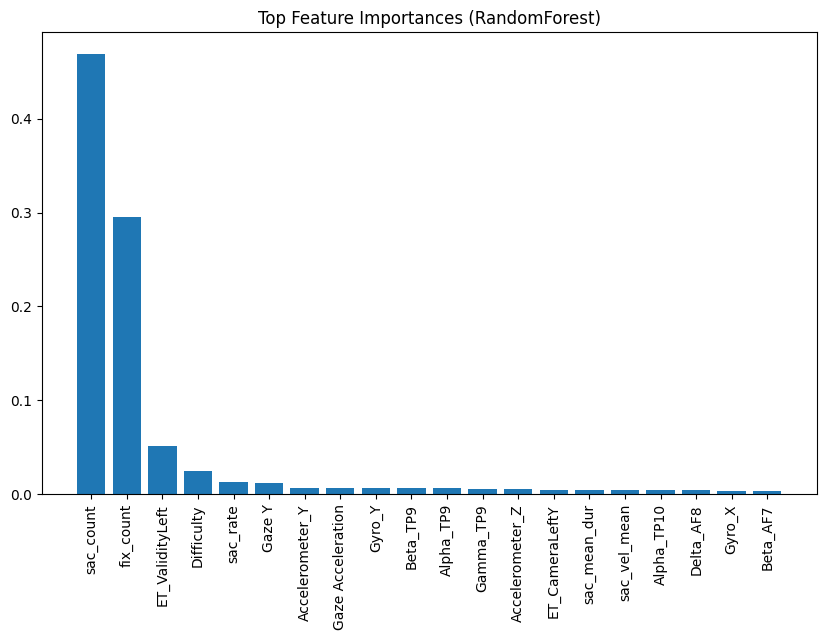

In [48]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [49]:
#XGBoost

In [50]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [51]:
from xgboost import XGBRegressor

In [52]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]   # for GroupKFold

In [53]:
xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="gpu_hist",   # GPU enabled
        predictor="gpu_predictor",
        random_state=42
    )

In [54]:
xgb_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", xgb_model)
        ])

In [55]:
xgb_pipe.fit(X_train,y_train)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [56]:
xgb_y_pred = xgb_pipe.predict(X_test)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [00:56:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [00:56:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This w

In [57]:
print("Mean Squared Error: ", mean_squared_error(y_test, xgb_y_pred))
print("R2 Score: ", r2_score(y_test, xgb_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, xgb_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, xgb_y_pred)))

Mean Squared Error:  13.254012130806693
R2 Score:  0.9295325000239394
Mean Absolute Error:  1.4221637032677374
Root Mean Squared Error:  3.64060601147758


In [58]:
xgb_model_cv  = XGBRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [59]:
xgb_pipe_cv = Pipeline([
        ("scaler", StandardScaler()),
        ("model", xgb_model_cv)
        ])

In [60]:
cv = GroupKFold(n_splits=5)

In [61]:
xgb_scores = cross_val_score(xgb_pipe_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [62]:
print("R² per fold:", xgb_scores)
print("Mean R²:", np.mean(xgb_scores))

R² per fold: [0.93460274 0.88525946 0.71015751 0.91391675 0.57290219]
Mean R²: 0.8033677307570759


In [63]:
xgb = xgb_pipe.named_steps["model"]

In [64]:
importances = xgb.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

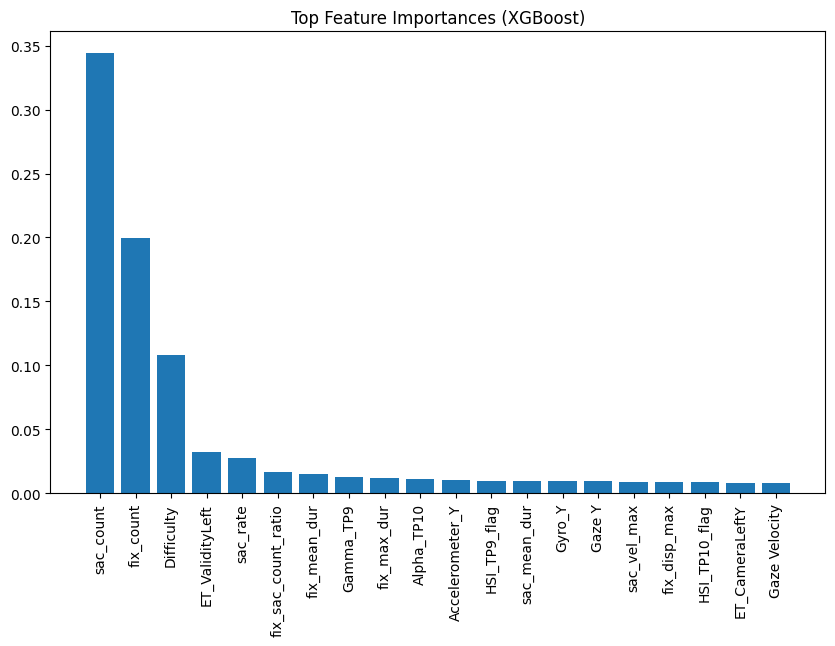

In [65]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (XGBoost)")
plt.show()

In [66]:
#lightGBM

In [67]:
from lightgbm import LGBMRegressor

In [68]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]   # for GroupKFold

In [69]:
lgb_model =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [70]:
lgb_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", lgb_model)
        ])

In [71]:
lgb_pipe.fit(X_train,y_train)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1158, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 51 dense feature groups (0.06 MB) transferred to GPU in 0.002211 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 16.447308


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05


In [72]:
lgb_y_pred = lgb_pipe.predict(X_test)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [73]:
print("Mean Squared Error: ", mean_squared_error(y_test, lgb_y_pred))
print("R2 Score: ", r2_score(y_test, lgb_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, lgb_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, lgb_y_pred)))

Mean Squared Error:  13.42465143503333
R2 Score:  0.9286252634039761
Mean Absolute Error:  1.6211643135004468
Root Mean Squared Error:  3.663966625807791


In [74]:
lgb_model_cv  = LGBMRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [75]:
lgb_pipe_cv = Pipeline([
        ("scaler", StandardScaler()),
        ("model", lgb_model_cv)
        ])

In [76]:
cv = GroupKFold(n_splits=5)

In [77]:
lgb_scores = cross_val_score(lgb_pipe_cv, X, y, cv=cv, groups=groups, scoring="r2")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 53
[LightGBM] [Info] Start training from score 16.242078


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1155, number of used features: 53
[LightGBM] [Info] Start training from score 16.577738


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1143, number of used features: 53
[LightGBM] [Info] Start training from score 16.512180


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1174, number of used features: 53
[LightGBM] [Info] Start training from score 16.818479


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12760
[LightGBM] [Info] Number of data points in the train set: 1174, number of used features: 53
[LightGBM] [Info] Start training from score 16.349525


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [78]:
print("R² per fold:", lgb_scores)
print("Mean R²:", np.mean(lgb_scores))

R² per fold: [0.92469619 0.85770711 0.70667692 0.91269599 0.65201275]
Mean R²: 0.8107577908344142


In [79]:
lgb = lgb_pipe.named_steps["model"]

In [80]:
importances = lgb.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

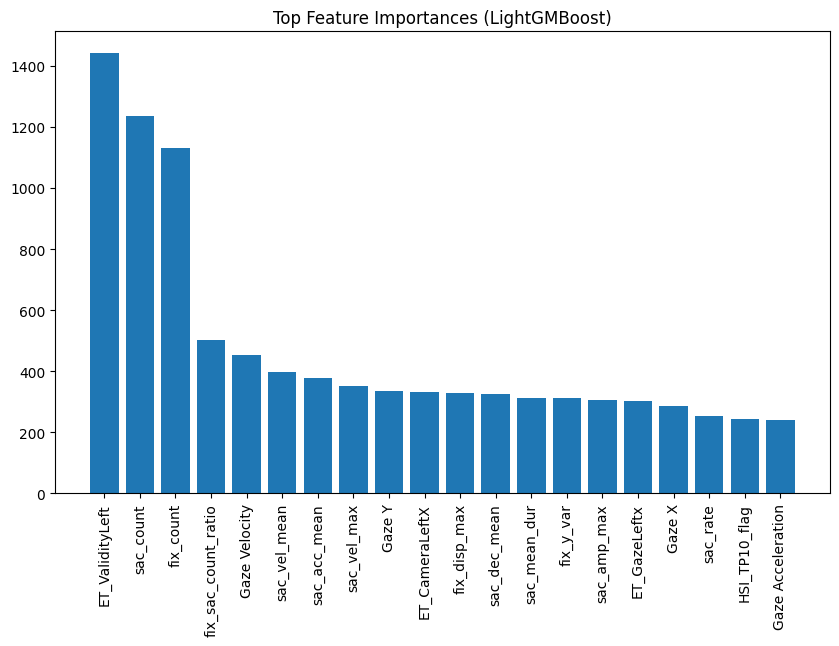

In [81]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (LightGMBoost)")
plt.show()

In [82]:
#Catboost

In [83]:
from catboost import CatBoostRegressor

In [84]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]   # for GroupKFold

In [85]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    task_type="GPU",
    devices='0',
    random_state=42,
    verbose=0,
    max_bin=128,          # fewer bins → less VRAM
    gpu_ram_part=0.1      # limit CatBoost to 10% GPU memory
)

In [86]:
cat_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", cat_model)
        ])

In [87]:
cat_pipe.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [88]:
cat_y_pred = cat_pipe.predict(X_test)

In [89]:
print("Mean Squared Error: ", mean_squared_error(y_test, cat_y_pred))
print("R2 Score: ", r2_score(y_test, cat_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, cat_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, cat_y_pred)))

Mean Squared Error:  15.677395950339852
R2 Score:  0.9166481147103019
Mean Absolute Error:  1.9747038997551025
Root Mean Squared Error:  3.959469150067955


In [90]:
cat_model_cv = CatBoostRegressor(
    n_estimators=300,
    random_state=42,
    thread_count=-1  # use all cores
    # max_depth can be omitted or set as integer, e.g., max_depth=6
)

In [91]:
cat_pipe_cv = Pipeline([
        ("scaler", StandardScaler()),
        ("model", cat_model_cv)
        ])

In [92]:
cv = GroupKFold(n_splits=5)

In [93]:
cat_scores = cross_val_score(cat_pipe_cv, X, y, cv=cv, groups=groups, scoring="r2")

Learning rate set to 0.111335
0:	learn: 12.9590494	total: 1.04ms	remaining: 311ms
1:	learn: 12.1691314	total: 1.73ms	remaining: 257ms
2:	learn: 11.4228770	total: 2.44ms	remaining: 242ms
3:	learn: 10.7961565	total: 3.2ms	remaining: 237ms
4:	learn: 10.2495111	total: 4.05ms	remaining: 239ms
5:	learn: 9.7416567	total: 4.83ms	remaining: 237ms
6:	learn: 9.2197383	total: 5.55ms	remaining: 232ms
7:	learn: 8.7399872	total: 6.29ms	remaining: 230ms
8:	learn: 8.3359235	total: 7.01ms	remaining: 227ms
9:	learn: 8.0330001	total: 7.77ms	remaining: 225ms
10:	learn: 7.7730055	total: 8.48ms	remaining: 223ms
11:	learn: 7.4878150	total: 9.2ms	remaining: 221ms
12:	learn: 7.2504908	total: 9.98ms	remaining: 220ms
13:	learn: 7.0433367	total: 10.7ms	remaining: 219ms
14:	learn: 6.8560286	total: 11.4ms	remaining: 217ms
15:	learn: 6.6166415	total: 12.2ms	remaining: 216ms
16:	learn: 6.4324255	total: 12.9ms	remaining: 215ms
17:	learn: 6.2701443	total: 13.7ms	remaining: 214ms
18:	learn: 6.1070560	total: 14.3ms	remain

In [94]:
print("R² per fold:", cat_scores)
print("Mean R²:", np.mean(cat_scores))

R² per fold: [0.90728357 0.86561177 0.77544144 0.95516819 0.65958615]
Mean R²: 0.8326182240013287


In [95]:
cat = cat_pipe.named_steps["model"]

In [96]:
importances = cat.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

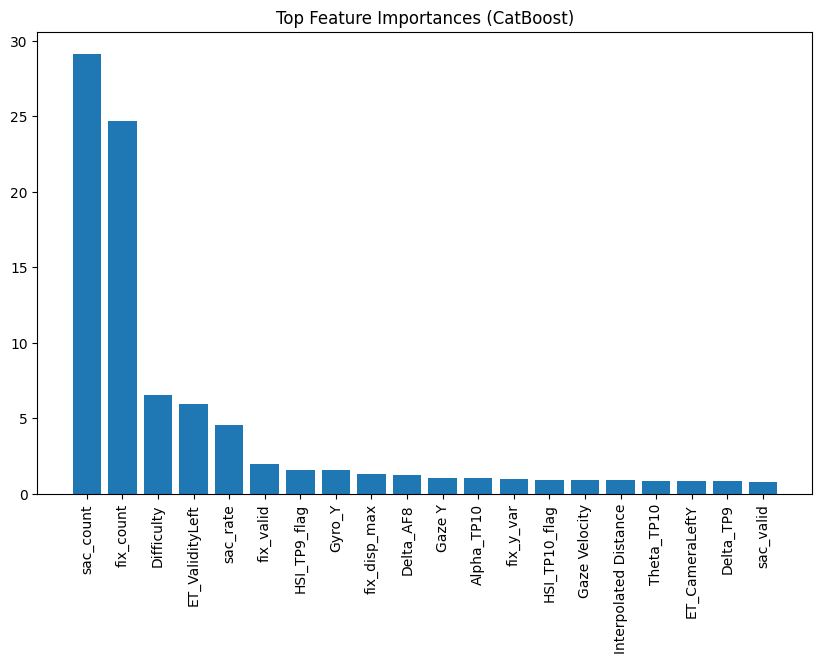

In [97]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (CatBoost)")
plt.show()

In [98]:
import joblib

In [100]:
joblib.dump(linear_pipeline, "models/Type_1_models/linear_model.joblib")

['models/Type_1_models/linear_model.joblib']

In [101]:
joblib.dump(rf_pipe, "models/Type_1_models/rf_model.joblib")

['models/Type_1_models/rf_model.joblib']

In [103]:
joblib.dump(xgb_pipe, "models/Type_1_models/xgb_model.joblib")

['models/Type_1_models/xgb_model.joblib']

In [104]:
joblib.dump(lgb_pipe, "models/Type_1_models/lgb_model.joblib")

['models/Type_1_models/lgb_model.joblib']

In [105]:
joblib.dump(cat_pipe, "models/Type_1_models/cat_model.joblib")

['models/Type_1_models/cat_model.joblib']